## Random Agent Example

Author: Robin Herrmann
<br>Date: 16. August 2023

### Initialize Environment

In [1]:
import gymnasium as gym
import time
import matplotlib.pyplot as plt
import numpy as np

import QArmEnv

In [2]:
# Register environment
MODULE_NAME = 'QArmEnv'
gym.envs.register(
    id='QArmEnv-v0',
    entry_point=f'{MODULE_NAME}:QArmEnv',
)

In [3]:
# Initialize env
env = gym.make('QArmEnv-v0')

/home/robin/.local/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


### Random Steps

In [4]:
# Initialize simulation
env.gzcon.unpause()
time.sleep(1)

episodes_rewards = []
episodes = 10

for i in range(episodes):
    rewards = []
    rewardsum = 0

    env.reset()

    truncated = False
    terminated = False
    while (truncated != True) and (terminated != True):
        observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
        rewardsum += reward
        rewards.append(rewardsum)
    
    episodes_rewards.append(rewards)

env.gzcon.pause()

env.close()

/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


RuntimeError: Unable to convert call argument to Python object (compile in debug mode for details)

### Visualization

In [14]:
# Reference reward for no movement
rewards_inactive = []
rewardsum_inactive = 0

for i in range(50):
    rewardsum_inactive -= i*0.1
    rewards_inactive.append(rewardsum_inactive)    

49
49
49
48
42
48
50
49
49
49


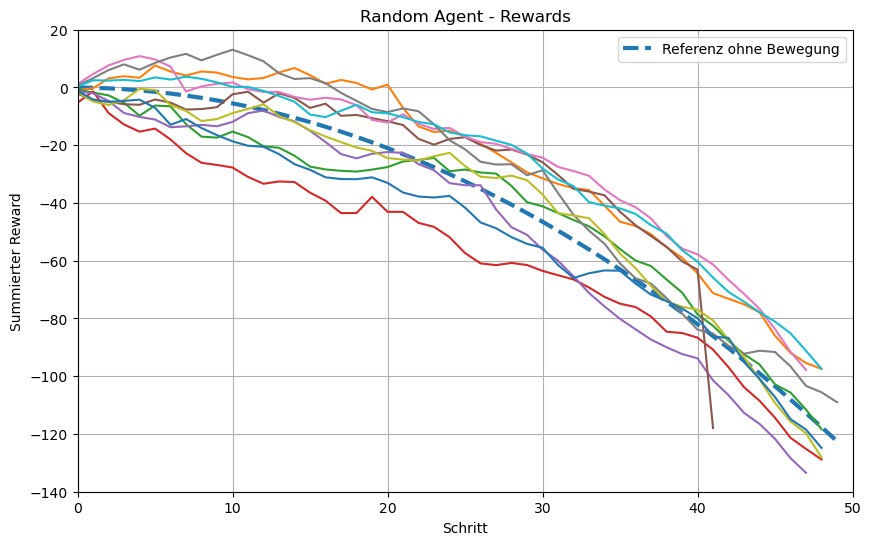

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Random Agent - Rewards')
ax.set_ylabel('Summierter Reward')
ax.set_xlabel('Schritt')

ax.plot(rewards_inactive, linestyle="dashed", linewidth=3)

for er in episodes_rewards:
    ax.plot(er)
    print(len(er))

ax.legend(labels=['Referenz ohne Bewegung'])
ax.grid()
ax.set_xbound(0, 50)
ax.set_ybound(-140, 20)

# fig.savefig('random_agent.png')